Order Book Data:


,price,bid_size,ask_size,bid_orders,ask_orders
0,100.1,500,400,10,12
1,100.2,700,500,14,16
2,100.3,1200,1000,20,25
3,100.4,1800,1500,50,10
4,100.5,4000,300,5,8
5,100.6,200,2000,30,40
6,100.7,1500,1800,10,50


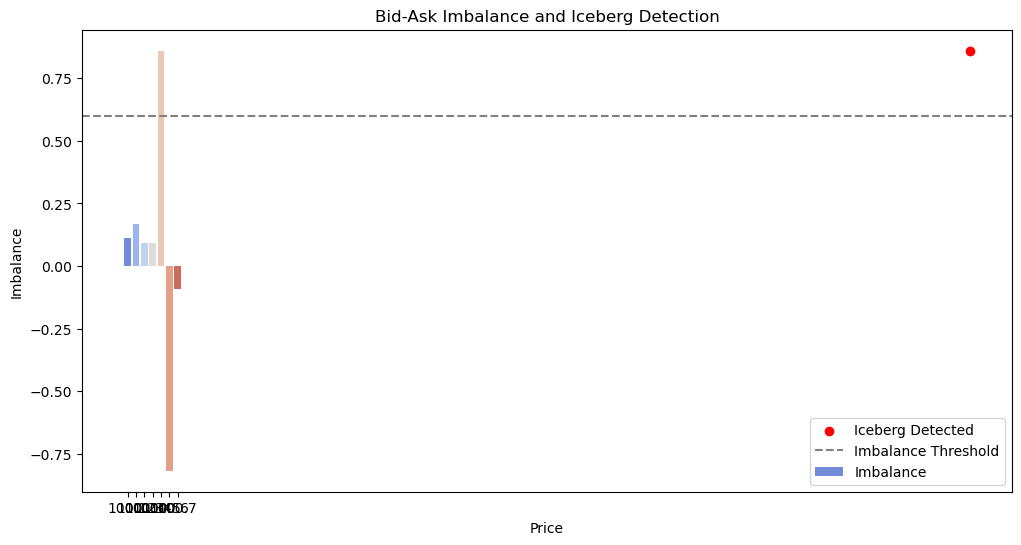


Detected Iceberg Orders:


,price,bid_size,ask_size,bid_orders,ask_orders,imbalance,order_ratio,iceberg_signal
4,100.5,4000,300,5,8,0.860465,0.384615,True


In [2]:
# Iceberg Order Detection Notebook

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plots for Jupyter
%matplotlib inline

# Sample Data: Simulated Order Book
# Columns: ['price', 'bid_size', 'ask_size', 'bid_orders', 'ask_orders']
data = {
    "price": [100.1, 100.2, 100.3, 100.4, 100.5, 100.6, 100.7],
    "bid_size": [500, 700, 1200, 1800, 4000, 200, 1500],
    "ask_size": [400, 500, 1000, 1500, 300, 2000, 1800],
    "bid_orders": [10, 14, 20, 50, 5, 30, 10],
    "ask_orders": [12, 16, 25, 10, 8, 40, 50],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the data
print("Order Book Data:")
display(df)

# Calculate Bid-Ask Imbalance
df["imbalance"] = (df["bid_size"] - df["ask_size"]) / (df["bid_size"] + df["ask_size"])
df["order_ratio"] = df["bid_orders"] / (df["bid_orders"] + df["ask_orders"])

# Detect Iceberg Order Indicators
# Criteria: High imbalance with a low number of bid orders
df["iceberg_signal"] = (df["imbalance"] > 0.6) & (df["bid_orders"] < 10)

# Visualize the Imbalance and Iceberg Signal
plt.figure(figsize=(12, 6))
sns.barplot(x=df["price"], y=df["imbalance"], palette="coolwarm", label="Imbalance")
plt.scatter(
    df["price"][df["iceberg_signal"]],
    df["imbalance"][df["iceberg_signal"]],
    color="red",
    label="Iceberg Detected",
    zorder=5,
)
plt.axhline(0.6, linestyle="--", color="gray", label="Imbalance Threshold")
plt.title("Bid-Ask Imbalance and Iceberg Detection")
plt.xlabel("Price")
plt.ylabel("Imbalance")
plt.legend()
plt.show()

# Highlight Detected Iceberg Orders
print("\nDetected Iceberg Orders:")
iceberg_orders = df[df["iceberg_signal"]]
display(iceberg_orders)
